In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1)

print("Feature Names:", boston.feature_names)
print("Data Shape:", boston.data.shape)
print("Target Variable Description:", boston.DESCR)

data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['Price'] = boston.target

display(data.head())

Feature Names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Data Shape: (506, 13)
Target Variable Description: **Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


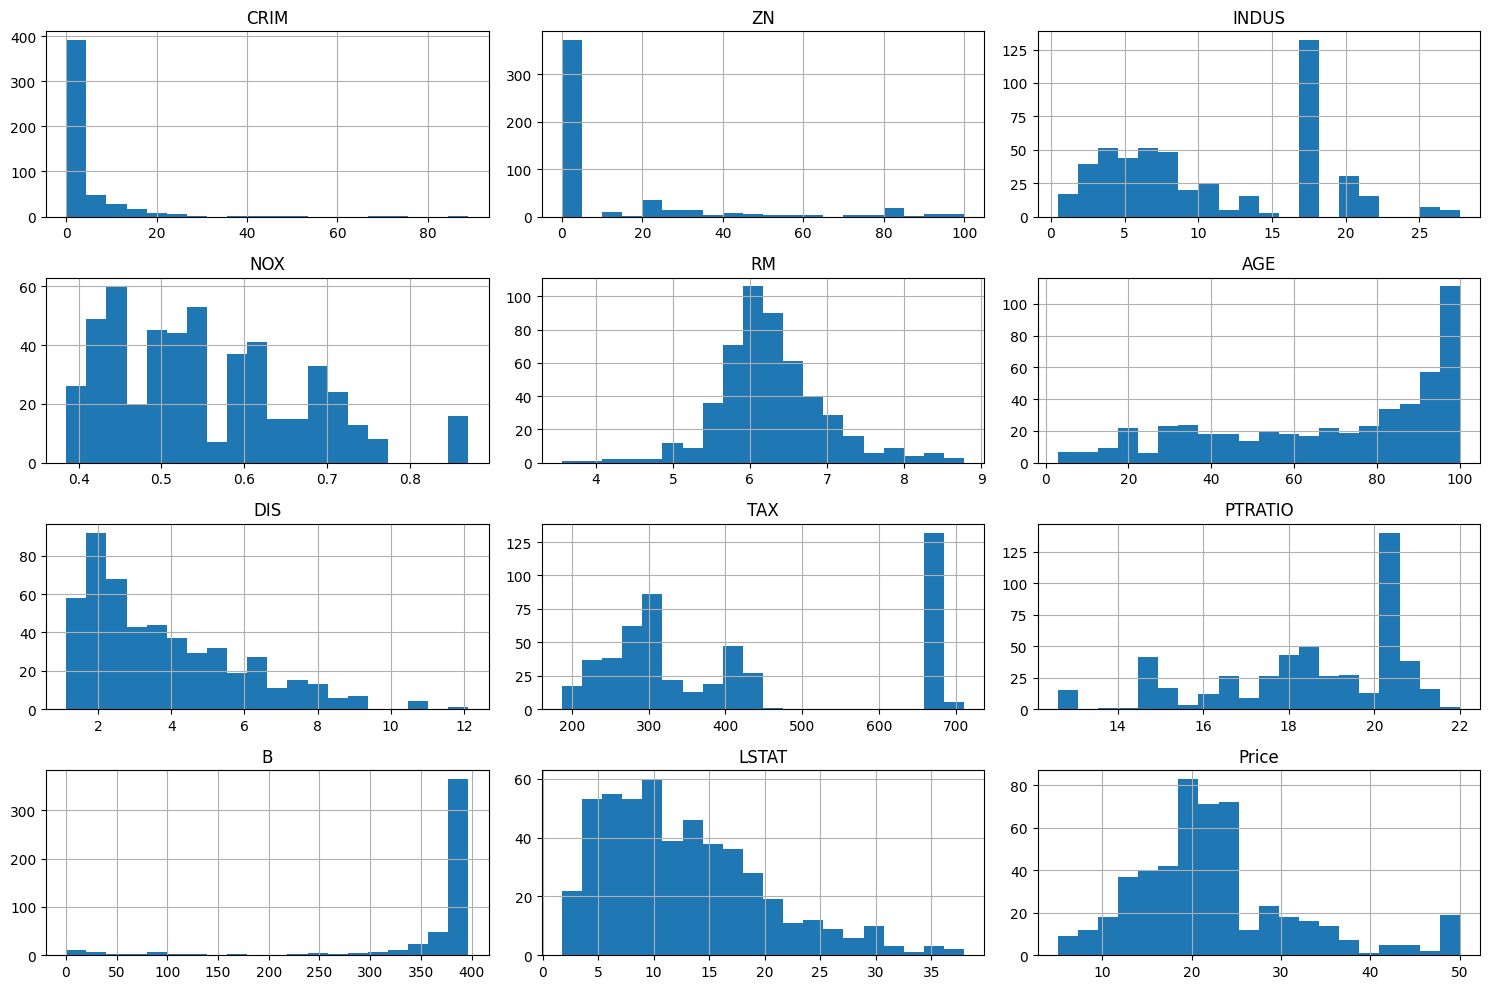

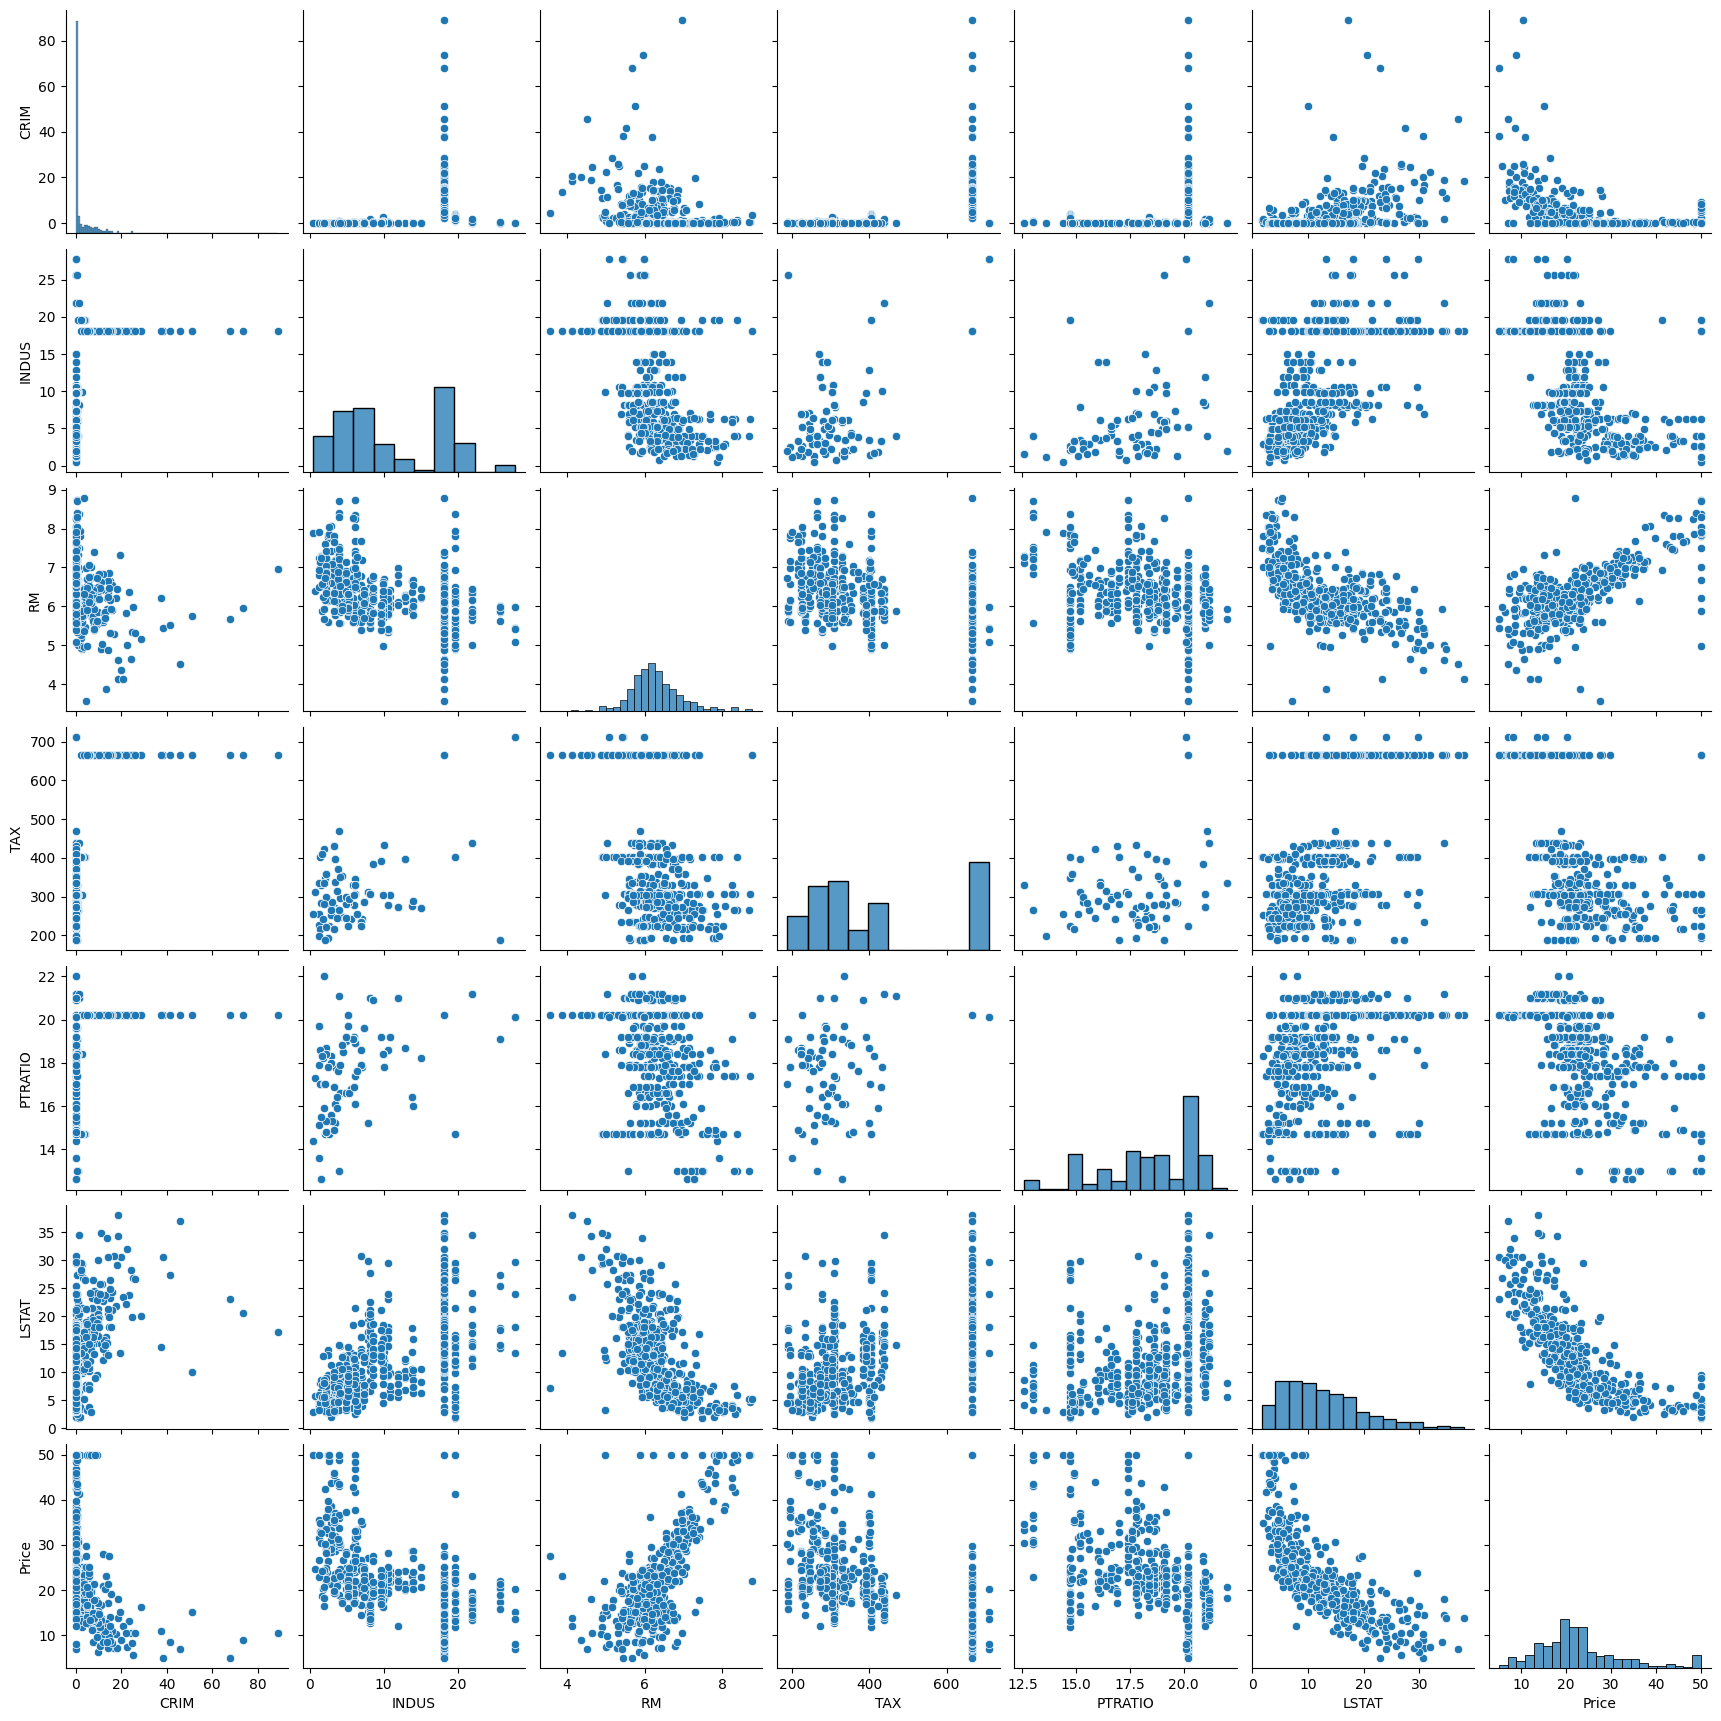

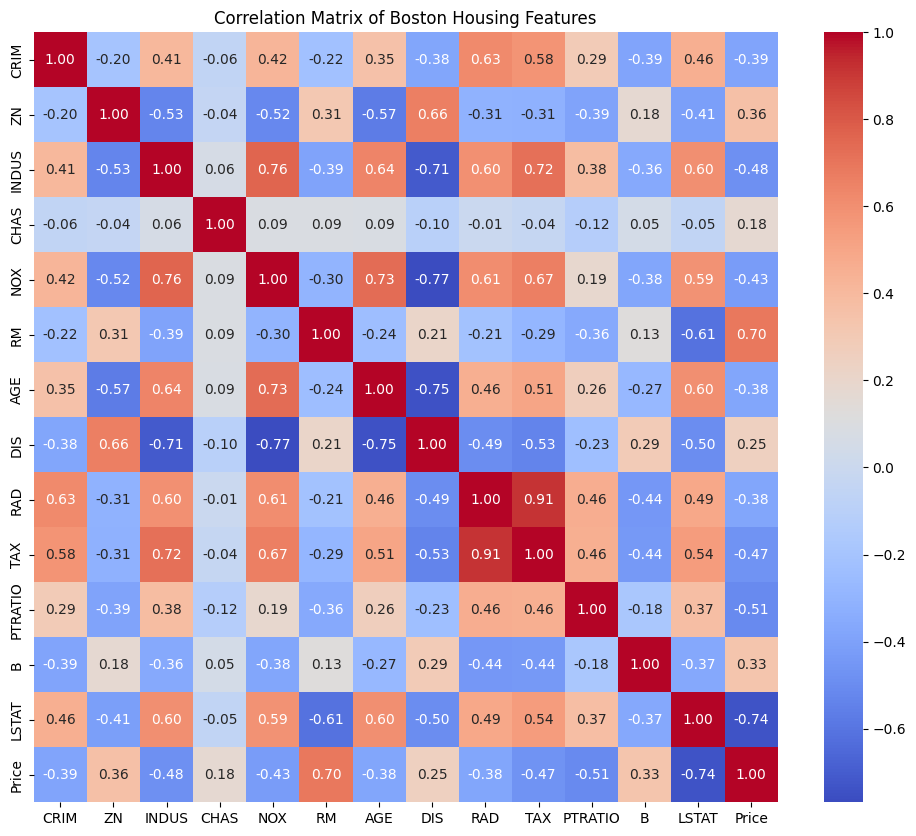

In [54]:
import seaborn as sns

data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

sns.pairplot(data[['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'Price']])
plt.show()

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boston Housing Features')
plt.show()

In [55]:
x = boston.data
y = boston.target

x['CHAS'] = x['CHAS'].astype(int)
x['RAD'] = x['RAD'].astype(int)

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
                                                    random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


/tmp/ipython-input-55-2888337265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['CHAS'] = x['CHAS'].astype(int)
/tmp/ipython-input-55-2888337265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['RAD'] = x['RAD'].astype(int)


In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

y_pred = regressor.predict(xtest)

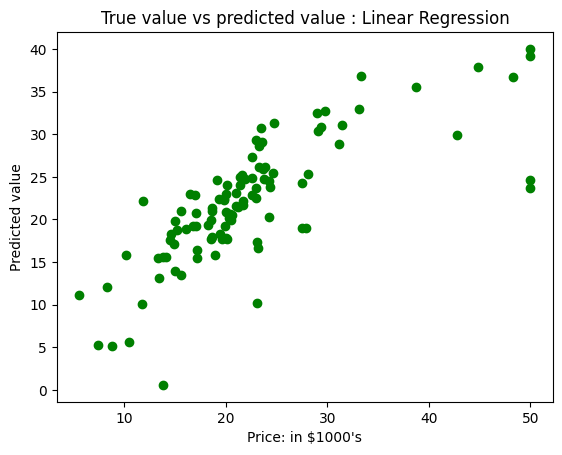

In [57]:
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)
print("Root Mean Square Error : ", rmse)
print("R2 Score : ", r2)

print("\nModel Coefficients:")
for feature, coef in zip(xtest.columns, regressor.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {regressor.intercept_}")

Mean Square Error :  33.44897999767639
Mean Absolute Error :  3.8429092204444983
Root Mean Square Error :  5.783509315085123
R2 Score :  0.5892223849182525

Model Coefficients:
CRIM: -0.11944344700245772
ZN: 0.04477995106651231
INDUS: 0.005485261681771535
CHAS: 2.34080360624206
NOX: -16.1236043154297
RM: 3.708709012219132
AGE: -0.0031210817807358453
DIS: -1.3863973702786796
RAD: 0.2441783269888148
TAX: -0.010989636563080024
PTRATIO: -1.0459211887459703
B: 0.0081101069327052
LSTAT: -0.49279272450471084
Intercept: 38.091694926302296


In [61]:
import joblib
import numpy as np

example_features = [
    0.1, 0.0, 10.0, 0, 0.5, 6.0,
    50.0, 4.0, 3, 300.0, 18.0, 350.0, 10.0
]

features = np.array([example_features])
prediction = regressor.predict(features)

print(f"Predicted house price: ${prediction[0]*1000:.2f}")

Predicted house price: $23143.08


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
